 ### Importando os pacotes numpy, matplotlib.pyplot e glob
 
 * Encurtamos os nomes ao usar o comando "as"
 * Na última linha utilizamos o matplotlib inline para plotar os gráficos sem abrir uma nova janela

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline

### Usando o pacote glob

* Usamos o comando abaixo para criar uma lista com todos os arquivos .txt dentro da pasta dados 
* Visualizamos a lista

In [6]:
arquivos = glob.glob("dados/*.txt")

In [7]:
print(arquivos)

['dados\\0.80S-49.02W-TAVG-Trend.txt', 'dados\\10.45S-48.27W-TAVG-Trend.txt', 'dados\\13.66S-38.81W-TAVG-Trend.txt', 'dados\\15.27S-47.50W-TAVG-Trend.txt', 'dados\\2.41S-60.27W-TAVG-Trend.txt', 'dados\\20.09S-44.36W-TAVG-Trend.txt', 'dados\\20.09S-54.60W-TAVG-Trend.txt', 'dados\\23.31S-42.82W-TAVG-Trend.txt', 'dados\\23.31S-46.31W-TAVG-Trend.txt', 'dados\\24.92S-49.66W-TAVG-Trend.txt', 'dados\\29.74S-51.69W-TAVG-Trend.txt', 'dados\\4.02S-40.98W-TAVG-Trend.txt', 'dados\\brazil-TAVG-Trend.txt']


### Usando o comando for para plotar todos os gráficos simultaneamente 

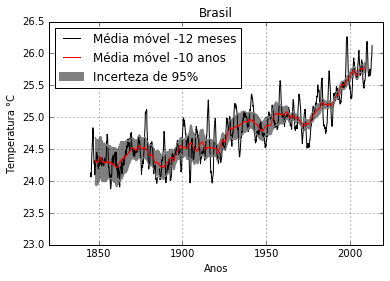

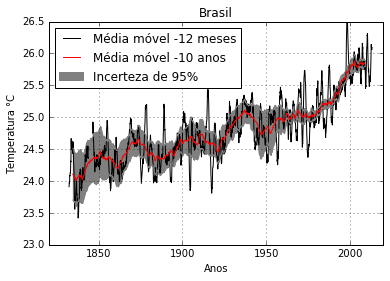

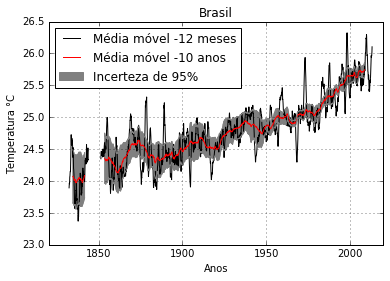

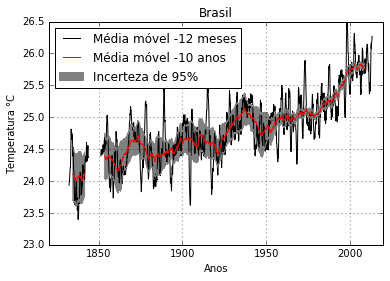

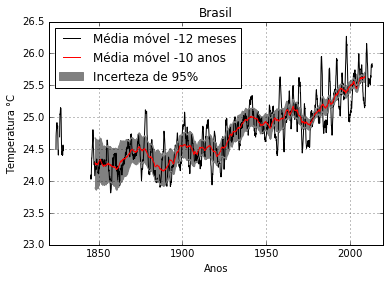

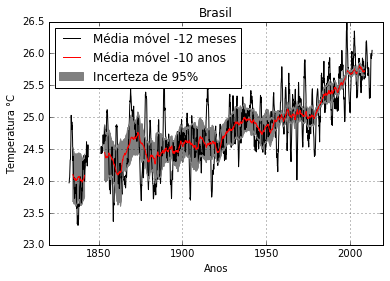

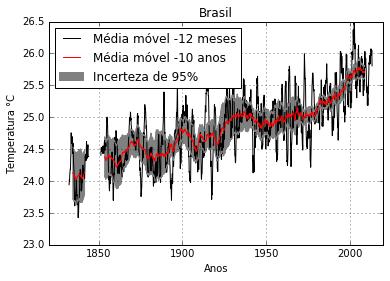

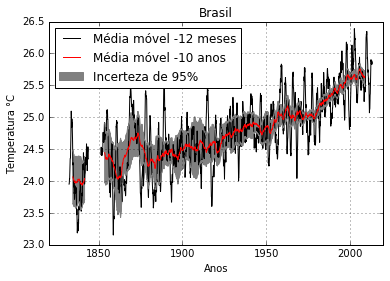

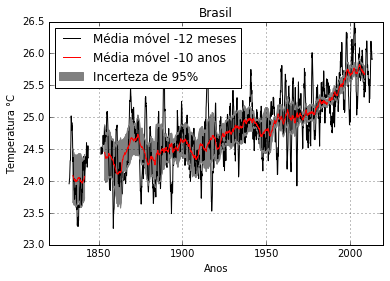

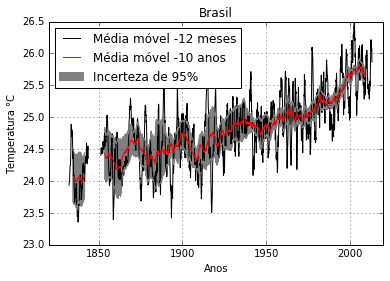

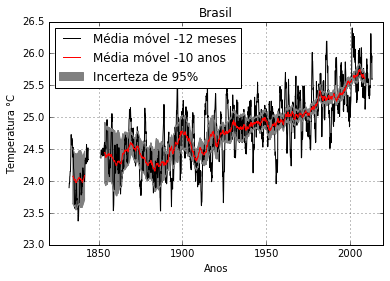

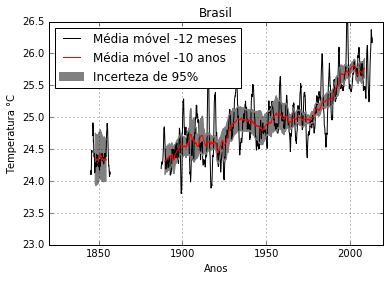

In [8]:
for arquivo in arquivos:
    #Todo arquivo que comece como definido retorna o valor "true", então para todo restante("false") executamos o seguinte.
    if arquivo.startswith("dados\\brazil") is False:
        #Chamamos arquivo de "dados" e carregamos arquivo definindo que comentários comecam com "%".
        dados = np.loadtxt(arquivo, comments = "%")
        #Nomeamos e definimos as variáveis.
        ano = dados[:,0]
        mes = dados[:,1]
        ano_decimal = ( ano + ( mes / 12))
        anom_1ano = dados[:,4]
        anom_10anos = dados[:,8]
        inc_10anos = dados[:,9]
        #Calculamos as médias e desvios padrões, explicitando "NaN" como falta de dados.
        media_1ano = np.nanmean(anom_1ano) 
        dp_1ano = np.nanstd(anom_1ano)
        media_10anos = np.nanmean(anom_10anos)
        #"Plotamos uma figura, para cada arquivo dentro de arquivos"
        plt.figure()
        #Plotamos a anomalia de temperatura média anual.
        plt.plot(ano_decimal,25 + anom_1ano, "black", label="Média móvel -12 meses")
        #Plotamos a anomalia de temperatura média para 10 anos.
        plt.plot(ano_decimal,25 + anom_10anos, "red", label="Média móvel -10 anos")
        #Plotamos a incerteza de +/- 95% ao redor da anomalia de temperatura média de 10 anos (Bônus).
        plt.plot(ano_decimal,((25 + anom_10anos) + inc_10anos), "gray",) 
        plt.plot(ano_decimal,((25 + anom_10anos) - inc_10anos), "gray") 
        #adicionamos grade.
        plt.grid(True) 
        #Definimos a escala do gráfico.
        plt.xlim(1820,2020)
        plt.ylim(23,26.5)
        #Preenchemos o espaco entre as plotagens de incerteza.
        plt.fill_between(ano_decimal, ((25 + anom_10anos) + inc_10anos), ((25 + anom_10anos) - inc_10anos), color="gray", label="Incerteza de 95%")
        #Nomeamos os eixos
        plt.xlabel ("Anos")
        plt.ylabel ("Temperatura °C")
        #Demos título ao gráfico.
        plt.title("Brasil")
        #Adicionamos legenda.
        plt.legend(loc="upper left")
        #Salvamos os gráficos em formato .png com o nome definido como abaixo.
        plt.savefig(arquivo[6:-4]+".png")
        